In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

from sparsebinarydistance.distance import sparseDistance
import seaborn as sns

In [90]:
import numpy as np
np.random.seed = 42.1337
# Generate binary samples from N groups:
n_samples = 100
n_features= 15
feature_matrix = np.zeros((n_samples,n_features))

feature_matrix[ np.random.randint(low=0,high=n_samples, size=int(n_samples/3)),0] = 1

for row in range(1,n_features):
    #pick a feature to inherit from:
    inherit = np.random.choice( np.where( feature_matrix.sum(0) )[0] )
    inherit_bool = np.random.randint(2)
    
    sample_from = np.where( feature_matrix[:,inherit]==inherit_bool )[0]
    set_samples = np.random.choice(sample_from, int(np.ceil(sample_from.shape[0]*0.5)))
    feature_matrix[set_samples,row] = 1
    

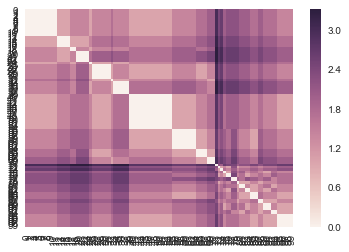

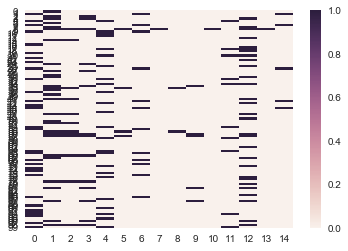

In [91]:
import scipy.cluster.hierarchy
fig, ax = plt.subplots()
import scipy.spatial
import pandas as pd

d = scipy.cluster.hierarchy.leaves_list(
    scipy.cluster.hierarchy.linkage(feature_matrix,metric='hamming',method='complete'))
sns.heatmap( scipy.spatial.distance.squareform(  scipy.spatial.distance.pdist(feature_matrix[d,:]) ) )
plt.show()
c = scipy.cluster.hierarchy.leaves_list(
    scipy.cluster.hierarchy.linkage(feature_matrix.T, metric='hamming',method='complete'))
sns.heatmap(feature_matrix[:,:])

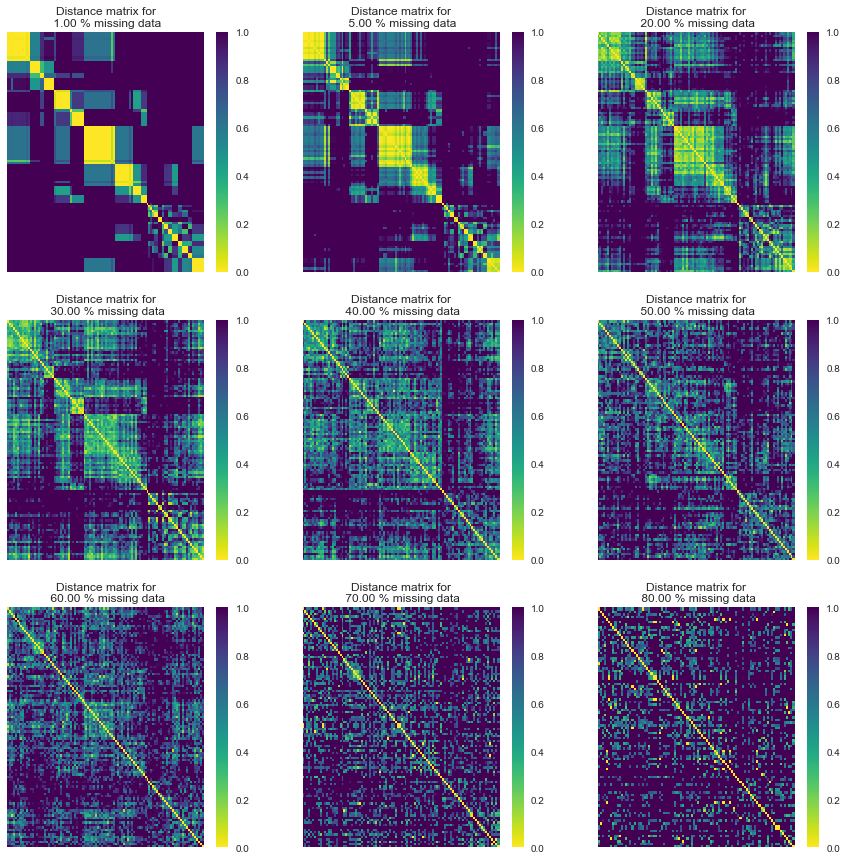

In [92]:
# randomly sample the feature matrix:
test_sparsities = [0.99, 0.95,0.8,0.7,0.6,0.5,0.4,0.3,0.2]

n_cols = 3
fig, axes = plt.subplots( int(np.ceil(len(test_sparsities)/n_cols)), n_cols, figsize=(15,15))
axes = axes.flatten()

for sparsity,ax in zip(test_sparsities, axes):
    
    total_elements = feature_matrix.flatten().shape[0]
    dropout_matrix = feature_matrix.copy()

    rs = np.random.choice(
            [True, False], 
            size=feature_matrix.flatten().shape[0], 
        p=[1-sparsity, sparsity]).reshape(feature_matrix.shape)

    dropout_matrix[rs] = np.nan
    keptX, jointMatrix, simMatrix, differenceMatrix, normalisationFactor = sparseDistance(
        pd.DataFrame(dropout_matrix[d,:])
        
    )
    sns.heatmap( np.clip(jointMatrix,0,1), ax=ax, cmap='viridis_r',xticklabels=False,yticklabels=False )
    
    ax.set_title("Distance matrix for\n %.2f %% missing data" % ((1-sparsity)*100.0 ))
